<a href="https://colab.research.google.com/github/szsavery/DSPS_SSavery/blob/main/Labs/kmeans_fromscratch_animated_Savery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl
import sklearn.cluster
import json
import os
import urllib
#pl.rcdefaults()
#url = "https://raw.githubusercontent.com/fedhere/PUI2015_fbianco/master/fbb_matplotlibrc.json"
#response = urllib.urlopen(url)
#s = json.loads(response.read())

#s['axes.edgecolor'] = 'white'
#pl.rcParams.update(s)
#%pylab inline


# I have made some points for y'all

## generating random data:
## 2 gaussian distributions, differnt means, different stsndard deviations


size of datasets (100, 2) (200, 2)


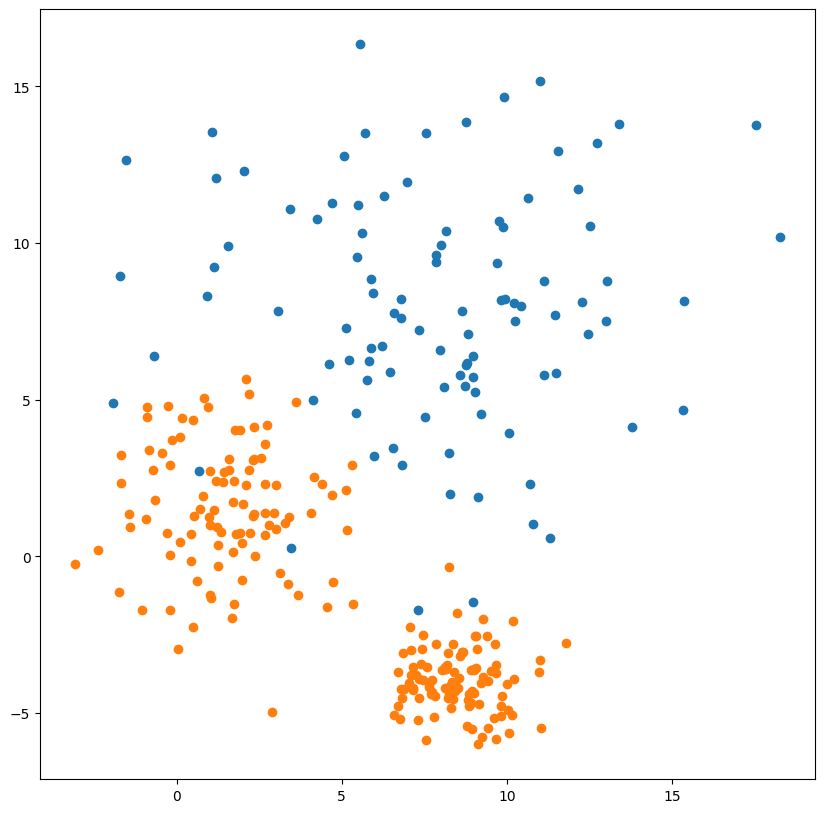

In [3]:
np.random.seed(302)
#make a set of random points

#random mean and std: centered on 0,0 from 5,10 stdev normals
k1s, k1m = np.random.rand() * 6, np.random.rand() * 10
#make the points from distribs centered in k1m and with k1s standard deviation
k1 = (k1s * np.random.randn(2, 100) + k1m).T

#random mean and std: centered on 0,0 from 3,10 stdev normals
k2s, k2m = np.random.rand() * 3, np.random.rand() * 10
#make the points from distribs centered in k2m and with kms standard deviation
k2 = (k2s * np.random.randn(2, 100) + k2m).T
#add some other points centered in elswhere (at 8.5, -1)
k2 = np.concatenate([k2, (np.random.randn(2, 100).T + np.array([8.5, -4]))])

print("size of datasets", k1.shape, k2.shape)

pl.figure(figsize = (10,10))
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o');



##choose 2 random starting points: random locations within the distribution


centers (0.41,13.71), (3.08,0.73)


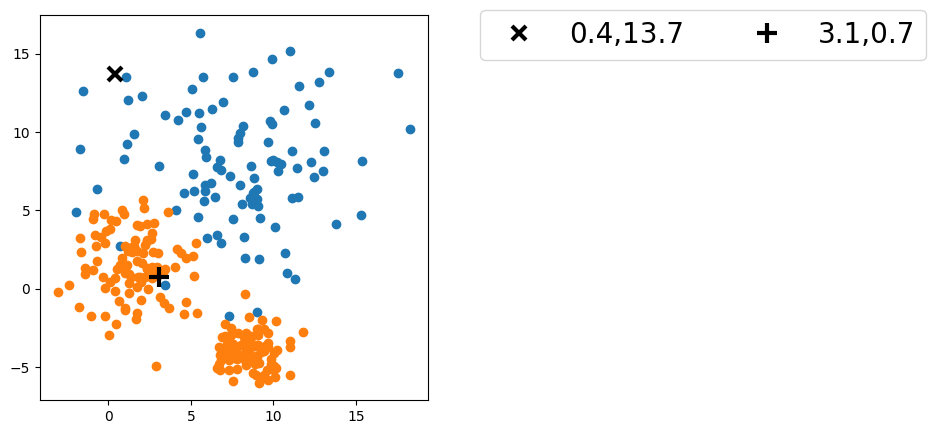

In [4]:
np.random.seed(1000000004)
#np.random.seed(302)
x0, y0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
x1, y1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()


x_save = (x0,x1)
y_save = (y0,y1)

pl.figure(figsize = (5,5))
print ("centers ({:0.2f},{:0.2f}), ({:0.2f},{:0.2f})".format(x0,y0,x1,y1))
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')

pl.plot([x0], [y0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(x0,y0))
pl.plot([x1], [y1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(x1,y1))
pl.legend(bbox_to_anchor=(1.1, 1.05), ncol= 2, numpoints=1, fontsize=20);

##define a distance metric


In [6]:
#Eucledian distance
def dist(data, c):
  return np.sqrt((data[0] - c[0])**2 + (data[1] - c[1])**2)

In [7]:
#Testing this function

dist([2,2],[-1,-2])

5.0

##calculate cluster membership


In [8]:
#this is how we make the groups if we have 2 groups - can you generalize to N clusters?: select in group what is closest
l1 = np.zeros(len(k1), int)
for i,k in enumerate(k1):
    l1[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
l2 = np.zeros(len(k2), int)
for i,k in enumerate(k2):
    l2[i] = 0 if dist(k, [x0, y0]) < dist(k, [x1, y1]) else 1
print(np.concatenate([l1, l2]))

[1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [11]:
#this is how we make the groups: select in group what is closest
def cluster_membership(centers, points):
  labels = []
  for p in points:
    center_dis = 100
    center_id = 0
    #calculate the distance between centers
    for i, c in enumerate(centers): #enumerate is grabbing both the index and the label
      temp_dis = dist(p,c) #Needs to be changed to work for size N matrix

      if temp_dis < center_dis:
        center_dis = temp_dis
        center_id = i

    labels.append(center_id)

  return np.array(labels)

labels = cluster_membership(([x0, y0], [x1, y1]), np.concatenate([k1,k2]))

labels

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

##calculate cluster center

In [12]:
def cluster_centers (labels, points):
  #Mean of points with a certain label
  label1 = 1
  one_center = points[labels == label1]
  one_x = np.mean(one_center[0])
  one_y = np.mean(one_center[1])

  print(one_x)
  print(one_y)

  return True #centers

cluster_centers(labels, np.concatenate([k1,k2]))

10.258042379899072
6.206071806905016


True

# Plot the clusters:
inner circle=true label

outer circle=cluster label

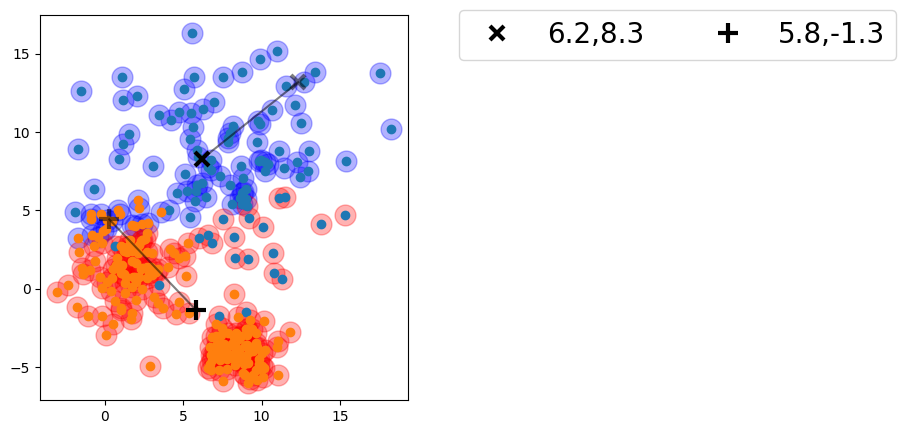

x0 12.33->5.00
y0 13.18->15.00

x1 0.27->10.00
y1 4.43->-5.00


In [ ]:
def plotclusters(k1, k2, labels, centers_old = ((None, None), (None, None)),
                 centers_new = ((None, None), (None, None))):
  (x0, y0), (x1, y1) = centers_old
  (xnew0, ynew0), (xnew1, ynew1) = centers_new

  fig = pl.figure(figsize = (5,5))
  ax = fig.add_subplot()
  ax.set_aspect("equal")

  pl.plot(k1[labels[:len(k1)]==0][:,0], k1[labels[:len(k1)]==0][:,1], 'bo', ms=15, alpha = 0.3)
  pl.plot(k2[labels[len(k1):]==0][:,0], k2[labels[len(k1):]==0][:,1], 'bo', ms=15, alpha = 0.3)
  pl.plot(k1[labels[:len(k1)]==1][:,0], k1[labels[:len(k1)]==1][:,1], 'ro', ms=15, alpha = 0.3)
  pl.plot(k2[labels[len(k1):]==1][:,0], k2[labels[len(k1):]==1][:,1], 'ro', ms=15, alpha = 0.3)
  pl.plot(k1[:,0], k1[:,1], 'o')
  pl.plot(k2[:,0], k2[:,1], 'o')

  pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
  pl.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)

  if not xnew0 is None:
    pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
    pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))

    pl.plot([x0, xnew0], [y0, ynew0], 'k-', alpha=0.5)
    pl.plot([x1, xnew1], [y1, ynew1], 'k-', alpha=0.5)

  pl.legend(bbox_to_anchor=(1.1, 1.05), ncol= 2, numpoints=1, fontsize=20)
  pl.show()


x0, y0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
x1, y1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()

plotclusters(k1, k2, labels,  centers_old = ((x0, y0), (x1, y1)), centers_new = cluster_centers(labels, np.concatenate([k1,k2])))

print(f"x0 {x0:.2f}->{xnew0:.2f}")
print(f"y0 {y0:.2f}->{ynew0:.2f}\n")
print(f"x1 {x1:.2f}->{xnew1:.2f}")
print(f"y1 {y1:.2f}->{ynew1:.2f}")


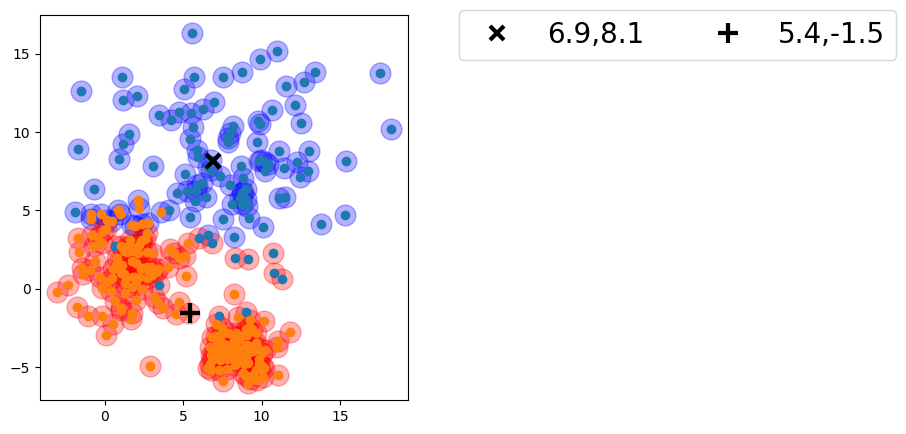

the original centers were:  2.1 18.2, 13.3 1.3
the new K-means center are: 6.9 8.1, 5.4 -1.5


In [ ]:
#for cheap animations
from IPython.display import clear_output
from time import sleep

l1old = labels[:len(k1)].copy()
l2old = labels[len(k1):].copy()

#random centers
np.random.seed(19808)
#np.random.seed(302)
xnew0, ynew0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
xnew1, ynew1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()

#fixed centers
xnew0, ynew0 = 5, 15
xnew1, ynew1 = 10, -5

#labels = cluster_membership(([x0, y0], [x1, y1]), np.concatenate([k1,k2]))
#(xnew0, ynew0), (xnew1, ynew1) = cluster_centers(labels, np.concatenate([k1,k2]))

while not xnew0 == x0 or  not ynew0 == y0 or  not xnew1 == x1 or  not ynew1 == y1:

    clear_output(wait=True)

    x0 = xnew0
    x1 = xnew1
    y0 = ynew0
    y1 = ynew1

    labels = cluster_membership(([x0, y0], [x1, y1]), np.concatenate([k1,k2]))
    l1, l2 = labels[:len(k1)], labels[len(k1):]


    (xnew0, ynew0), (xnew1, ynew1) = cluster_centers(labels, np.concatenate([k1,k2]))

    plotclusters(k1, k2, labels, centers_old = ((x0, y0), (x1, y1)),
                 centers_new = ((xnew0, ynew0), (xnew1, ynew1)))

    l1old = l1.copy()
    l2old = l2.copy()

    pl.show()

    sleep(2)



print ("the original centers were:  %.1f %.1f, %.1f %.1f"%(x_save[0], y_save[0],
                                                         x_save[1], y_save[1]))
print ("the new K-means center are: %.1f %.1f, %.1f %.1f"%(xnew0, ynew0,
                                                         xnew1, ynew1))



6.892874041027752 8.137584769824937 5.412157712361777 -1.5171758632326038
1
2
3
4


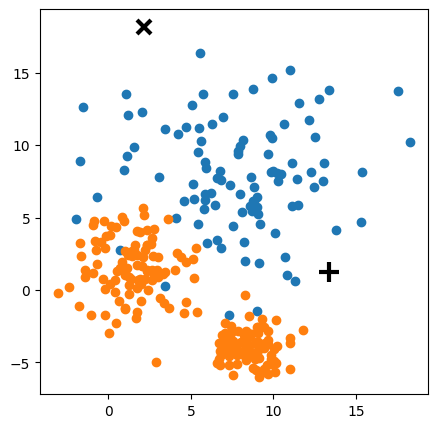

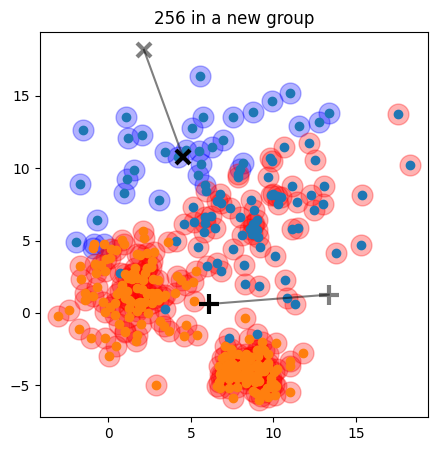

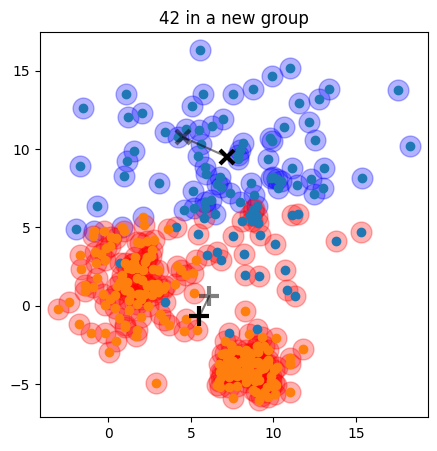

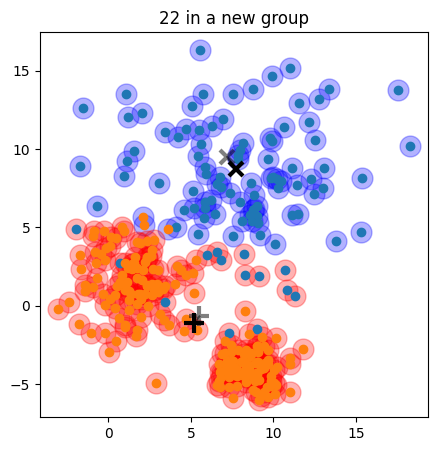

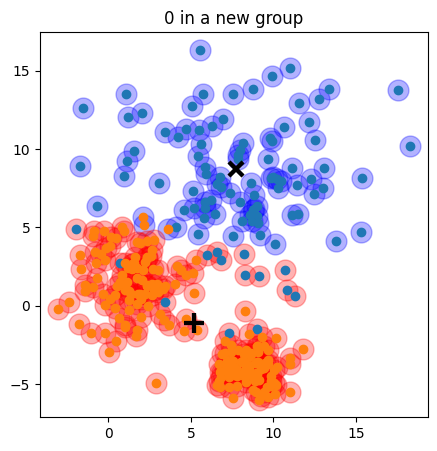

In [ ]:
np.random.seed(19808)

xnew0, ynew0 = (max(k1[:,0]) - (min(k1[:,0]) - 1)) * \
    np.random.rand(), (max(k1[:,1]) - (min(k1[:,1]) - 1)) * \
    np.random.rand()
xnew1, ynew1 = (max(k2[:,0]) - (min(k2[:,0]) - 1)) * \
    np.random.rand(), (max(k2[:,1]) - (min(k2[:,1]) - 1)) * \
    np.random.rand()
l1old = np.empty_like(l1)
l2old = np.empty_like(l2)
l1 = np.empty_like(l1)
l2 = np.empty_like(l2)
x_save = (xnew0, xnew1)
y_save = (ynew0, ynew1)
pl.figure(figsize = (5,5))
print (x0,y0,x1,y1)
pl.plot(k1[:,0], k1[:,1], 'o')
pl.plot(k2[:,0], k2[:,1], 'o')
pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0, ynew0))
pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1, ynew1))
#pl.legend(loc = 'upper center', ncol= 2, numpoints=1, fontsize=20)
iteration = 0

pl.savefig("kmgif/kmcluster_{}".format(iteration))
while not xnew0 == x0 or  not ynew0 == y0 or  not xnew1 == x1 or  not ynew1 == y1:
    iteration = iteration+1
    pl.figure(figsize=(5,5))
    x0 = xnew0
    x1 = xnew1
    y0 = ynew0
    y1 = ynew1

    labels = cluster_membership(([x0, y0], [x1, y1]), np.concatenate([k1,k2]))
    l1, l2 = labels[:len(k1)], labels[len(k1):]

    pl.plot(k1[l1==0][:,0], k1[l1==0][:,1], 'bo', ms=15, alpha = 0.3)
    pl.plot(k2[l2==0][:,0], k2[l2==0][:,1], 'bo', ms=15, alpha = 0.3)
    pl.plot(k1[l1==1][:,0], k1[l1==1][:,1], 'ro', ms=15, alpha = 0.3)
    pl.plot(k2[l2==1][:,0], k2[l2==1][:,1], 'ro', ms=15, alpha = 0.3)
    pl.plot(k1[:,0], k1[:,1], 'o')
    pl.plot(k2[:,0], k2[:,1], 'o')

    (xnew0, ynew0), (xnew1, ynew1) = cluster_centers(labels, np.concatenate([k1,k2]))

    pl.plot([x0], [y0], 'kx', ms = 10, mew=3, alpha=0.5)
    pl.plot([x1], [y1], 'k+', ms = 15, mew=3, alpha=0.5)

    pl.plot([xnew0], [ynew0], 'kx', ms = 10, mew=3, label="%.1f,%.1f"%(xnew0,ynew0))
    pl.plot([xnew1], [ynew1], 'k+', ms = 15, mew=3, label="%.1f,%.1f"%(xnew1,ynew1))

    pl.plot([x0, xnew0], [y0, ynew0], 'k-', alpha=0.5)
    pl.plot([x1, xnew1], [y1, ynew1], 'k-', alpha=0.5)

    #pl.legend(loc = 'upper right', ncol= 2, numpoints=1, fontsize=20)
    pl.title("%d in a new group"%(sum(~(
                    l1old == l1))+sum(~(l2old == l2))))
    l1old = l1
    l2old = l2
    pl.savefig("kmgif/kmcluster_{}".format(iteration))
    print(iteration)

# with sklearn k-means

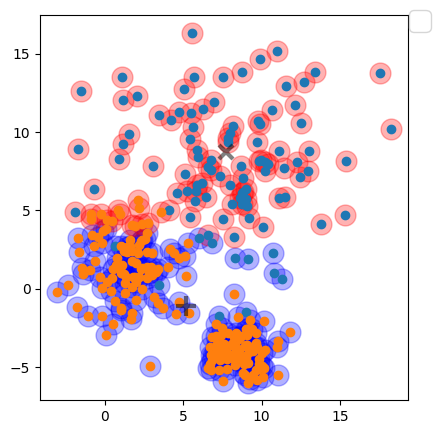

In [ ]:
from sklearn import cluster

clf_km = cluster.KMeans(n_clusters=2, n_init='auto')
#get the cluster label for every point
labels = clf_km.fit_predict(np.concatenate([k1,k2])) #.reshape(100,2)

plotclusters(k1, k2, labels, ((x0, y0), (x1, y1)))



# w sklearn DBScan

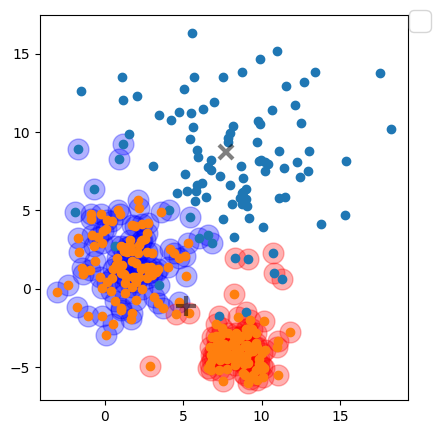

In [ ]:
clf_km = cluster.KMeans(n_clusters=3, n_init='auto')
#get the cluster label for every point
labels = clf_km.fit_predict(np.concatenate([k1,k2])) #.reshape(100,2)

plotclusters(k1, k2, labels, ((x0, y0), (x1, y1)))

In [ ]:
clf_dbs = cluster.DBSCAN(eps=1.9, min_samples=3, metric='euclidean')
labels = clf_dbs.fit_predict(np.concatenate([k1,k2])) #.reshape(100,2)

plotclusters(k1, k2, labels)

